In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [9]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test):
    r2_train = metrics.r2_score(y_train, y_pred_train)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)

    print(f"The r2_score for train: {r2_train}") 
    print(f"The r2_score for test: {r2_test}")
    print(f"The mean_absolute_error for train: {MAE_train}")
    print(f"The mean_absolute_error for test: {MAE_test}")
    print(f"The mean_squared_error for train: {MSE_train}")
    print(f"The mean_Squared_error for test: {MSE_test}")
    print(f"The root_mean_squared_error for train: {RMSE_train}")
    print(f"The root_mean_Squared_error for test: {RMSE_test}")


In [3]:
df =pd.read_csv("D:/Project/Clickstream_Project/Clickstream/Dataset for Notebooks folder/Final dataset for Regression model.csv")

In [3]:
df.head()

,order,page,page2_grouped_Category 1,country_24,country_44,colour_3,colour_4,colour_6,colour_9,colour_14,...,location_3,location_4,location_5,location_6,model_photography_2,page1_main_category_2,page1_main_category_3,first_page_freq,last_page_freq,price
0,-0.580383,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,-0.34856,3.182581,33
1,-0.506083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.34856,3.182581,52
2,-0.431783,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,-0.34856,3.182581,38
3,-0.357482,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,-0.34856,3.182581,52
4,-0.283182,4,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,-0.34856,3.182581,57


In [12]:
df.shape

(132379, 22)

In [4]:
x = df.drop('price', axis=1)
y = df['price']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_train = linear_model.predict(x_train)

In [17]:
y_pred_test = linear_model.predict(x_test)

In [18]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.29042963160811985
The r2_score for test: 0.29137550440909255
The mean_absolute_error for train: 9.02026066707995
The mean_absolute_error for test: 9.038301769676798
The mean_squared_error for train: 111.31646383228522
The mean_Squared_error for test: 112.00762570153161
The root_mean_squared_error for train: 10.55066177224373
The root_mean_Squared_error for test: 10.58336551865859


In [91]:
#Ridge model

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_model = Ridge()
param_grid = {'alpha' :[0.1,0.5,0.4,10,2,6,25,35,46,90,150]}

ridge_regressor = GridSearchCV(ridge_model, param_grid,  scoring= 'r2',
            n_jobs=-1, verbose =2, cv=5)
ridge_regressor.fit(x_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 0.4, 10, 2, 6, 25, 35, 46, 90,
                                   150]},
             scoring='r2', verbose=2)

In [21]:
ridge_regressor.best_params_

{'alpha': 2}

In [ ]:
ridge_model = Ridge(alpha = 2)
ridge_model.fit(x_train, y_train)

Ridge(alpha=2)

In [23]:
y_pred_train = ridge_model.predict(x_train)

In [24]:
y_pred_test = ridge_model.predict(x_test)

In [25]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.290429593771079
The r2_score for test: 0.2913752862985656
The mean_absolute_error for train: 9.020242812535882
The mean_absolute_error for test: 9.038284607141591
The mean_squared_error for train: 111.3164697681103
The mean_Squared_error for test: 112.00766017683189
The root_mean_squared_error for train: 10.550662053544805
The root_mean_Squared_error for test: 10.583367147407856


In [26]:
#lasso model

In [27]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()
param_grid = {'alpha' :[0.2,0.5,1,6,9,15,26,49,88,150,93]}

lasso_regressor = GridSearchCV(lasso_model, param_grid, scoring = 'r2', n_jobs=-1, verbose = 2, cv=5)
lasso_regressor.fit(x_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.2, 0.5, 1, 6, 9, 15, 26, 49, 88, 150, 93]},
             scoring='r2', verbose=2)

In [29]:
lasso_regressor.best_params_

{'alpha': 0.2}

In [ ]:
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [31]:
y_pred_train = lasso_model.predict(x_train)

In [32]:
y_pred_test = lasso_model.predict(x_test)

In [ ]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.24705026727948687
The r2_score for test: 0.2478699963828419
The mean_absolute_error for train: 9.247771948909252
The mean_absolute_error for test: 9.269476581094773
The mean_squared_error for train: 118.12176131292766
The mean_Squared_error for test: 118.88425597508123
The root_mean_squared_error for train: 10.8683835648604
The root_mean_Squared_error for test: 10.90340570533268


In [34]:
# Gradient boosting model

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=200,random_state=1,verbose=2)
gbr.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         148.3275           14.51s
         2         141.2132           11.78s
         3         135.2904           12.26s
         4         130.1760           12.43s
         5         125.9963           11.95s
         6         122.5141           11.94s
         7         119.1952           11.56s
         8         116.6611           11.80s
         9         113.8728           11.71s
        10         111.9185           11.48s
        11         109.8085           11.27s
        12         108.2283           11.33s
        13         106.8678           11.12s
        14         105.1639           11.09s
        15         104.0473           11.05s
        16         102.7407           11.53s
        17         101.4223           11.33s
        18         100.4040           11.20s
        19          99.6486           11.14s
        20          98.9261           11.16s
        21          97.7799           11.12s
        2

GradientBoostingRegressor(n_estimators=200, random_state=1, verbose=2)

In [37]:
y_pred_train = gbr.predict(x_train)

In [38]:
y_pred_test = gbr.predict(x_test)

In [39]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.6133164000125886
The r2_score for test: 0.6154173774978833
The mean_absolute_error for train: 5.915737994574033
The mean_absolute_error for test: 5.925794427360999
The mean_squared_error for train: 60.66241332778446
The mean_Squared_error for test: 60.788452418103574
The root_mean_squared_error for train: 7.788607919762328
The root_mean_Squared_error for test: 7.796694967619522


In [ ]:
#GBR with Hyperparameter Tuning

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=2000,  # Set a high number, but early stopping will prevent unnecessary iterations
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    validation_fraction=0.2,  # 20% of training data used for validation
    n_iter_no_change=10,  # Stop if no improvement for 10 consecutive iterations
    random_state=42
)

gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=2000,
                          n_iter_no_change=10, random_state=42, subsample=0.8,
                          validation_fraction=0.2)

In [58]:
y_pred_train = gbr.predict(x_train)

In [59]:
y_pred_test = gbr.predict(x_test)

In [60]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8144491560369926
The r2_score for test: 0.8008961793355062
The mean_absolute_error for train: 3.230141355799419
The mean_absolute_error for test: 3.353579304799949
The mean_squared_error for train: 29.10897175408949
The mean_Squared_error for test: 31.471034884472957
The root_mean_squared_error for train: 5.395273093559722
The root_mean_Squared_error for test: 5.609905069114179


In [40]:
gbr = GradientBoostingRegressor(
    learning_rate=0.09,
    n_estimators=1000,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    verbose = 1
)

gbr.fit(x_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         148.9989           7.4725           35.07s
         2         144.6631           6.1076           31.53s
         3         141.7137           3.0741           27.20s
         4         138.7451           5.3768           28.48s
         5         130.9952           7.1601           26.38s
         6         125.9007           4.1257           26.97s
         7         122.2694           6.3734           25.53s
         8         118.5623           1.2948           24.86s
         9         115.8249           3.8191           27.29s
        10         112.0038           3.6809           26.15s
        20          87.9972           4.1039           25.25s
        30          77.5375           0.9765           24.69s
        40          70.5544          -0.2540           23.97s
        50          65.2004          -1.3200           23.49s
        60          61.7703           0.1048           23.21s
       

GradientBoostingRegressor(learning_rate=0.09, max_depth=5, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=8,
                          n_estimators=1000, subsample=0.8, verbose=1)

In [41]:
y_pred_train = gbr.predict(x_train)

In [42]:
y_pred_test = gbr.predict(x_test)

In [43]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8184678997672651
The r2_score for test: 0.8053444183510865
The mean_absolute_error for train: 3.078939498738566
The mean_absolute_error for test: 3.20845805990962
The mean_squared_error for train: 28.47851653635548
The mean_Squared_error for test: 30.767930922094962
The root_mean_squared_error for train: 5.336526635964209
The root_mean_Squared_error for test: 5.546884794377378


In [24]:
# Random forest model

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(random_state = 1, verbose = 1)
rfr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.7s


RandomForestRegressor(random_state=1, verbose=1)

In [46]:
y_pred_train = rfr.predict(x_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


In [47]:
y_pred_test = rfr.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [48]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.966562667993951
The r2_score for test: 0.803910100984762
The mean_absolute_error for train: 0.7686704337292484
The mean_absolute_error for test: 1.9852348500739525
The mean_squared_error for train: 5.245604558340051
The mean_Squared_error for test: 30.994644059594545
The root_mean_squared_error for train: 2.290328482628649
The root_mean_Squared_error for test: 5.567283364406247


In [ ]:
#Tunned

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [10, 20],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [10, 20],
    'max_features': ['sqrt', 'log2']
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=parameters,  # Correct parameter name
    cv=3,                   # Cross-validation folds
    verbose=2,
    scoring='neg_mean_absolute_error',
    n_jobs=6
)

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=6,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 20]},
             scoring='neg_mean_absolute_error', verbose=2)

In [51]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [52]:
best_params = grid_search.best_params_

In [53]:
rfr_tune = RandomForestRegressor(**best_params, random_state = 1, n_jobs=5)
rfr_tune.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_jobs=5, random_state=1)

In [54]:
y_pred_train = rfr_tune.predict(x_train)

In [55]:
y_pred_test = rfr_tune.predict(x_test)

In [56]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8457808399940278
The r2_score for test: 0.8174039874156036
The mean_absolute_error for train: 2.785826027876294
The mean_absolute_error for test: 3.0156468544551243
The mean_squared_error for train: 24.193698485404038
The mean_Squared_error for test: 28.861753946412193
The root_mean_squared_error for train: 4.918709026299893
The root_mean_Squared_error for test: 5.372313649296008


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [500, 1000, 1500],  # More trees for better learning
    'max_depth': [10, 20, 30, None],  # Deeper trees might improve performance
    'min_samples_split': [2, 5, 10],  # Avoid too much branching
    'min_samples_leaf': [1, 2, 4],  # Helps prevent overfitting
    'max_features': ['sqrt', 'log2'],  # Feature selection per split
    'bootstrap': [True, False]  # Try both bootstrap methods
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=50,  # More iterations for a better search
    cv=5,  # 5-fold cross-validation
    verbose=2, 
    n_jobs=-1, 
    scoring='r2'  # Optimize for R² score
)

# Fit the model
rf_search.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", rf_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 1500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


In [63]:
best_params = grid_search.best_params_

In [64]:
rfr_tune1 = RandomForestRegressor(**best_params, random_state = 1, n_jobs=5)
rfr_tune1.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_jobs=5, random_state=1)

In [65]:
y_pred_train = rfr_tune1.predict(x_train)

In [66]:
y_pred_test = rfr_tune1.predict(x_test)

In [67]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8457808399940278
The r2_score for test: 0.8174039874156037
The mean_absolute_error for train: 2.7858260278762934
The mean_absolute_error for test: 3.0156468544551243
The mean_squared_error for train: 24.193698485404038
The mean_Squared_error for test: 28.861753946412186
The root_mean_squared_error for train: 4.918709026299893
The root_mean_Squared_error for test: 5.372313649296007


In [97]:
rfr_tune2 = RandomForestRegressor(
    n_estimators=1200,            # Reduce to 1200 to balance performance & computation
    max_depth=18,                 # Reduce slightly to prevent overfitting (from 20 to 18)
    min_samples_split=12,         # Increase to 12 (prevents overfitting by requiring more samples per split)
    min_samples_leaf=2,           # Increase to 2 (reduces variance without hurting accuracy)
    max_features='sqrt',          # Use 'sqrt' instead of 'log2' (better for large datasets)
    bootstrap=True,               # Keep bootstrap for randomness
    random_state=1,               # Ensure reproducibility
    n_jobs=-1                     # Use all available cores for efficiency
)
rfr_tune2.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=12, n_estimators=1200, n_jobs=-1,
                      random_state=1)

In [101]:
y_pred_train = rfr_tune2.predict(x_train)

In [102]:
y_pred_test = rfr_tune2.predict(x_test)

In [103]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8556392153978507
The r2_score for test: 0.8244771116030233
The mean_absolute_error for train: 2.505266430386315
The mean_absolute_error for test: 2.7617297929776536
The mean_squared_error for train: 22.647129550216082
The mean_Squared_error for test: 27.743751603204583
The root_mean_squared_error for train: 4.758900035745244
The root_mean_Squared_error for test: 5.267233771459606


In [68]:
from lightgbm import LGBMRegressor

In [69]:
model_lgbm = LGBMRegressor(n_jobs=-1, random_state=1)
model_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 92665, number of used features: 21
[LightGBM] [Info] Start training from score 43.767550


LGBMRegressor(n_jobs=-1, random_state=1)

In [70]:
y_pred_train = model_lgbm.predict(x_train)

In [71]:
y_pred_test = model_lgbm.predict(x_test)

In [72]:
evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.817863828113736
The r2_score for test: 0.8133522763621076
The mean_absolute_error for train: 3.1372733583278576
The mean_absolute_error for test: 3.1798894890220213
The mean_squared_error for train: 28.57328250089903
The mean_Squared_error for test: 29.502181334901362
The root_mean_squared_error for train: 5.345398254657835
The root_mean_Squared_error for test: 5.431591050042461


In [ ]:
# Track Experiment using mlflow

In [104]:
models = [
    (
        'Linear Regression',
        LinearRegression(),
        (x_train, y_train),
        (x_test, y_test)    
    ),
    (
        'Ridge Regression',
        Ridge(alpha=2),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Lasso Regression',
        Lasso(alpha=0.2),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Gradient Boosting Regressor HyperTuned 1',
        GradientBoostingRegressor(
            learning_rate=0.09,
            n_estimators=1000,
            max_depth=5,
            min_samples_split=8,
            min_samples_leaf=5,
            subsample=0.8,
            max_features='sqrt',
            verbose = 1
        ),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Gradient Boosting Regressor HyperTuned 2',
        RandomForestRegressor(
            n_estimators=1200,            
            max_depth=18,                
            min_samples_split=12,        
            min_samples_leaf=2,         
            max_features='sqrt',        
            bootstrap=True,            
            random_state=1,              
            n_jobs=-1                   
        ),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        'Random Forest Regressor',
        RandomForestRegressor(
            max_depth=20,
            max_features='sqrt',
            min_samples_leaf=5,
            min_samples_split=10,
            random_state=1,
            n_jobs=5
        ),
        (x_train, y_train),
        (x_test, y_test)
        
    ),
    (
        'Random Forest Regressor HyperTuned 2',
        RandomForestRegressor(
            n_estimators= 1500,
            min_samples_split= 10,
            min_samples_leaf= 1,
            max_features= 'log2',
            max_depth= 20,
            bootstrap= True,
            random_state = 1,
            n_jobs=5),
        (x_train, y_train),
        (x_test, y_test)      
    ),
    (
        'LGBM Regressor',
        LGBMRegressor(n_jobs=-1, random_state=1),
        (x_train, y_train),
        (x_test, y_test)
    )
    
]

In [105]:
train_reports = []
test_reports = []

for model_name, model, (x_train, y_train), (x_test, y_test) in models:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_report = {
        'model': model_name,
        'r2': metrics.r2_score(y_train, y_pred_train),
        'mae': mean_absolute_error(y_train, y_pred_train),
        'mse': mean_squared_error(y_train, y_pred_train),
        'rmse': np.sqrt(mean_squared_error(y_train, y_pred_train))
    }
    
    test_report = {
        'model': model_name,
        'r2': metrics.r2_score(y_test, y_pred_test),
        'mae': mean_absolute_error(y_test, y_pred_test),
        'mse': mean_squared_error(y_test, y_pred_test),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }
    
    train_reports.append(train_report)
    test_reports.append(test_report)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         150.9592           5.8783           27.72s
         2         146.8984           5.7033           30.11s
         3         143.0616           3.3808           25.91s
         4         137.6103           5.3818           27.26s
         5         131.9291           4.4149           25.03s
         6         126.3158           7.3284           23.59s
         7         122.6997           3.1551           24.57s
         8         120.0925           1.3196           23.51s
         9         116.2587           4.5435           25.14s
        10         112.6306           2.8786           24.12s
        20          90.4653           1.9134           25.25s
        30          80.0967           0.6885           25.35s
        40          71.3308           0.5569           25.09s
        50          66.4535          -0.0858           24.81s
        60          62.6834          -0.4206           24.37s
       

In [106]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature


x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

mlflow.set_experiment("Clickstream Regression Model")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

for i, element in enumerate(models):
    model_name = element[0]
    model = element[1]
    train_report = train_reports[i]
    test_report = test_reports[i]   
    
    with mlflow.start_run(run_name = model_name):
        mlflow.log_param("model_name", model_name)
        
        mlflow.log_metrics({
            "train_r2": train_report['r2'],
            "train_mae": train_report['mae'],
            "train_mse": train_report['mse'],
            "train_rmse": train_report['rmse']
         })  
        mlflow.log_metrics({
            "test_r2": test_report['r2'],
            "test_mae": test_report['mae'],
            "test_mse": test_report['mse'],
            "test_rmse": test_report['rmse']
        })
        
         # Infer signature
        signature = infer_signature(x_train, model.predict(x_train))
        
        
        mlflow.sklearn.log_model(model, "model", input_example=x_train[:5], signature=signature)

🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/413778294774381645/runs/87e25edfaeb14d42925acd8019bbad60
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/413778294774381645
🏃 View run Ridge Regression at: http://127.0.0.1:5000/#/experiments/413778294774381645/runs/d8a0e9c96ed94dc4ba9b71be39c8b096
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/413778294774381645
🏃 View run Lasso Regression at: http://127.0.0.1:5000/#/experiments/413778294774381645/runs/2c821c5c6235426cb6b704f615b5ff5c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/413778294774381645
🏃 View run Gradient Boosting Regressor HyperTuned 1 at: http://127.0.0.1:5000/#/experiments/413778294774381645/runs/d2c3ed53f5f0471b96b43e2f34c5e84a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/413778294774381645
🏃 View run Gradient Boosting Regressor HyperTuned 2 at: http://127.0.0.1:5000/#/experiments/413778294774381645/runs/6be8f1e3132e4d1185bb03a7717979dd
🧪 View experiment 

In [ ]:
# Final Selected model Gradient Boosting Regressor HyperTuned 2

In [12]:
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
run_id = "6be8f1e3132e4d1185bb03a7717979dd"

model_uri = f"runs:/{run_id}/model"

model = mlflow.sklearn.load_model(model_uri)


In [1]:
import joblib

joblib.dump(model, "D:/Project/Clickstream_Project/Clickstream//Model/Clickstream_regression_model_GBR.pkl")

NameError: name 'model' is not defined

In [14]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

evaluation_metrics(y_train, y_pred_train, y_test, y_pred_test)

The r2_score for train: 0.8556392153978508
The r2_score for test: 0.8244771116030232
The mean_absolute_error for train: 2.505266430386315
The mean_absolute_error for test: 2.7617297929776536
The mean_squared_error for train: 22.64712955021608
The mean_Squared_error for test: 27.743751603204586
The root_mean_squared_error for train: 4.758900035745244
The root_mean_Squared_error for test: 5.2672337714596065


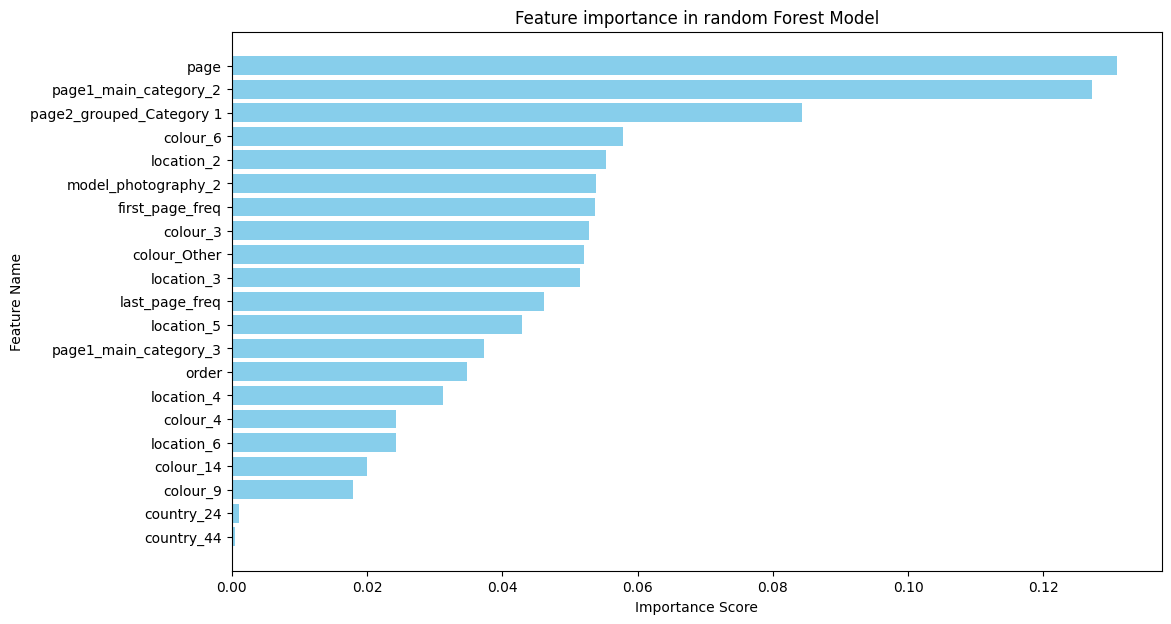

In [15]:
# Feature Important Analysis

feature_importance = model.feature_importances_

# convert to dataframe
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

#plot
plt.figure(figsize=(12,7))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature importance in random Forest Model")
plt.gca().invert_yaxis()
plt.show()

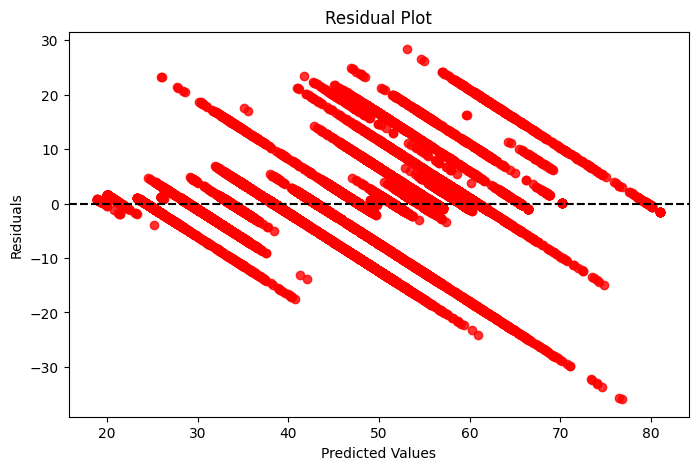

In [16]:
# Residual Plot
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


plt.figure(figsize=(8, 5))
sns.residplot(x=y_test_pred, y=y_test - y_test_pred, color="red", line_kws={"linewidth": 2})
plt.axhline(0, color='black', linestyle='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

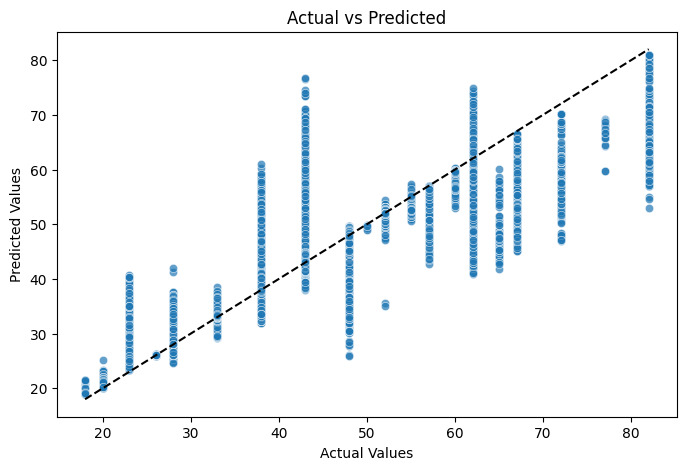

In [17]:
# === PREDICTED vs ACTUAL PLOT ===
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='dashed')  # Perfect Prediction Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

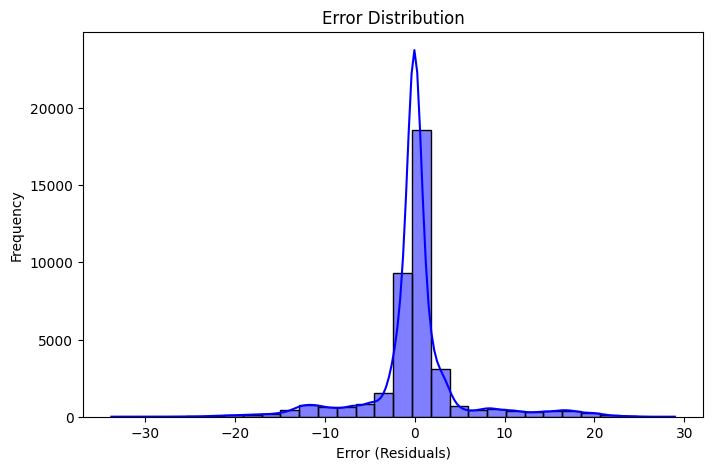

In [18]:
#  ERROR DISTRIBUTION PLOT ===
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_test_pred, bins=30, kde=True, color="blue")
plt.xlabel("Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()